<a href="https://colab.research.google.com/github/AmoguJUduka/MachineLearning/blob/main/DeepLearningAssignments/Lab_2_Build_a_DNN_step_by_step(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Implementation of Neural Network from scratch using Numpy**

__Step 1 : Creating the data set using numpy array of 0s and 1s.
As the image is a collection of pixel values in a matrix, we will create those matrices of pixels for A, B, C__

In [ ]:
# Creating data set

# A
a =[0, 0, 1, 1, 0, 0,
0, 1, 0, 0, 1, 0,
1, 1, 1, 1, 1, 1,
1, 0, 0, 0, 0, 1,
1, 0, 0, 0, 0, 1]
# B
b =[0, 1, 1, 1, 1, 0,
0, 1, 0, 0, 1, 0,
0, 1, 1, 1, 1, 0,
0, 1, 0, 0, 1, 0,
0, 1, 1, 1, 1, 0]
# C
c =[0, 1, 1, 1, 1, 0,
0, 1, 0, 0, 0, 0,
0, 1, 0, 0, 0, 0,
0, 1, 0, 0, 0, 0,
0, 1, 1, 1, 1, 0]

# Creating labels
y =[[1, 0, 0],
[0, 1, 0],
[0, 0, 1]]


**Transform to numpy arrays**

In [ ]:
import numpy as np
a = np.array(a)
b = np.array(b)
c = np.array(c)

__Step 2 : Visualization of data set__

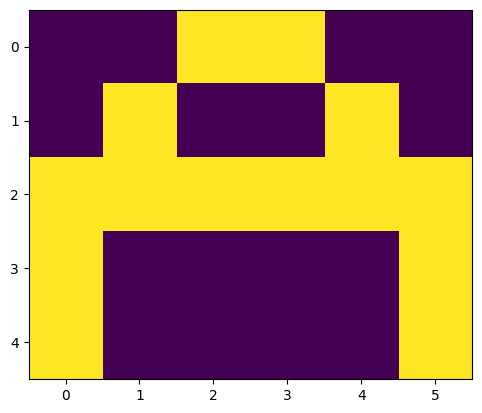

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
# visualizing the data, plotting A.
plt.imshow(np.array(a).reshape(5, 6))
plt.show()

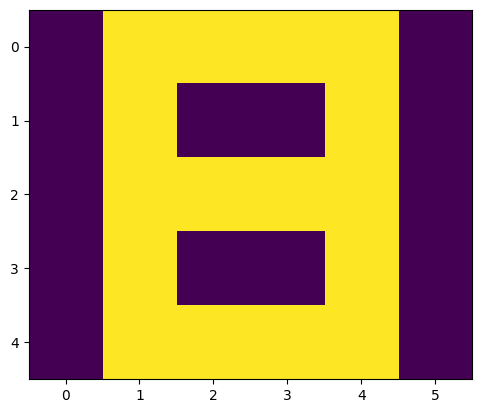

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
# visualizing the data, plotting B.
plt.imshow(np.array(b).reshape(5, 6))
plt.show()

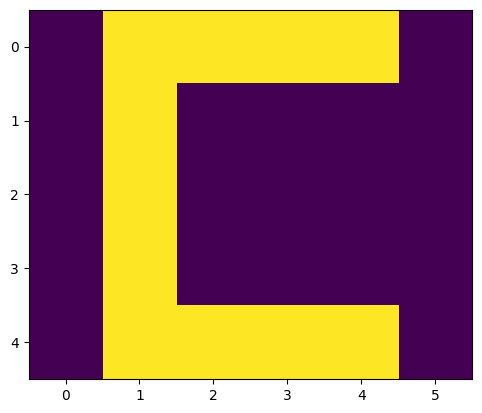

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
# visualizing the data, plotting C.
plt.imshow(np.array(c).reshape(5, 6))
plt.show()

__Step 3 :As the data set is in the form of list we will convert it into numpy array__

In [ ]:
# converting data and labels into numpy array

"""
Convert the matrix of 0 and 1 into one hot vector
so that we can directly feed it to the neural network,
these vectors are then stored in a list X.
"""

X = np.concatenate((np.array(a).reshape(1, 30), np.array(b).reshape(1, 30), np.array(c).reshape(1, 30)), axis = 0).T
Y = np.array(y)

print(X.shape, "\n", Y.shape)

(30, 3) 
 (3, 3)


__Step 4 : Defining the architecture or structure of the deep neural network. This includes deciding the number of layers and the number of nodes in each layer. Our neural network is going to have the following structure__

<div class="alert alert-block alert-success"> 1st layer: Input layer(1, 30) <br>
2nd layer: Hidden layer (1, 5)<br>
3rd layer: Output layer(1, 3)<br>
The output $Y$ of all three samples is of size (3, 3)

__Step 5: Declaring and defining all the function to build deep neural network__

__Step 5.1: Determine the input layer size and the output size__

In [ ]:
def layer_sizes(X, Y):
    """
    Argument:
    X -- input dataset of shape (input size, number of examples)
    Y -- labels of shape (output size, number of examples)
    Return:
    n_x -- the number of nodes in the input layer
    n_y -- the number of nodes in the output layer
     """
    ### extract the layer sizes from input and output shapes ###
    n_x = X.shape[0] # size of input layer
    n_y = Y.shape[0] # size of output layer
    ######
    return (n_x, n_y)

__Step 5.2: Parameter initialization.__ <br>
The shapes of parameters W1, b1, W2 and b2 are determined by the
layer sizes (n_x, n_h, n_y). The elements in W1 and W2 are initialized to small random numbers
while those in b1 and b3 are initialized to zeros. The results are stored in a python dictionary
parameter.

In [ ]:
# FUNCTION: initialize_parameters

def initialize_parameters(n_x, n_h, n_y):
    """
    Argument:
    n_x -- size of the input layer
    n_h -- size of the hidden layer
    n_y -- size of the output layer
    Returns:
    params -- python dictionary containing parameters:
    W1 -- weight matrix of shape (n_h, n_x)
    b1 -- bias vector of shape (n_h, 1)
    W2 -- weight matrix of shape (n_y, n_h)
    b2 -- bias vector of shape (n_y, 1)
    """
    np.random.seed(2) # set up a seed for reproductivity.

    W1 = np.random.randn(n_h, n_x) * 0.01 # random numbers for weights
    b1 = np.zeros((n_h, 1)) # zeros for bias
    W2 = np.random.randn(n_y, n_h) * 0.01
    b2 = np.zeros((n_y, 1))
    assert (W1.shape == (n_h, n_x))
    assert (b1.shape == (n_h, 1))
    assert (W2.shape == (n_y, n_h))
    assert (b2.shape == (n_y, 1))

    parameters = {"W1": W1,
                  "b1": b1,
                  "W2": W2,
                  "b2": b2}

    return parameters

__Step 5.3: Forward propagation__

**Activation Functions**


In [ ]:
# sigmoid function
def sigmoid(z):
    s = 1/(1+np.exp(-z))
    return s

# relu function
def relu(z):
    return np.maximum(0,z)

# tanh function
def tanh(z):
    return np.tanh(z)

In [ ]:
# FUNCTION: forward_propagation
def forward_propagation(X, parameters, activation="sigmoid"):
    """
    Argument:
    X -- input data of size (n_x, m)
    parameters -- python dictionary containing your parameters

    Return:
    A2 -- The sigmoid output of the second activation
    cache -- a dictionary containing "Z1", "A1", "Z2" and "A2"
    """

    # Number of examples
    m = X.shape[1]

    # Retrieve each parameter from the dictionary "parameters"
    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]

    # Implement Forward Propagation to calculate A2 (probabilities)
    if activation == "sigmoid":
        Z1 = np.dot(W1, X) + b1
        A1 = sigmoid(Z1)
        Z2 = np.dot(W2, A1) + b2
        A2 = sigmoid(Z2)

    elif activation == "relu":
        Z1 = np.dot(W1, X) + b1
        A1 = relu(Z1)
        Z2 = np.dot(W2, A1) + b2
        A2 = sigmoid(Z2)

    assert(A2.shape == (3, X.shape[1]))
    A1 = sigmoid(Z1)
    Z2 = np.dot(W2, A1) + b2
    A2 = sigmoid(Z2)

    assert(A2.shape == (3, X.shape[1]))

    cache = {"Z1": Z1,
            "A1": A1,
            "Z2": Z2,
            "A2": A2} # Results at all layers

    return A2, cache

__Step 5.4: Cost function__

In [ ]:
def compute_cost(A2, Y, parameters, loss_function="SSE"):
    """
    Computes the sum-of-squares loss (you may opt to the cross-entropy loss)

    Argument:
    A2 -- The output of the seccond layer, of shape (1, number of examples)
    Y -- "true" labels vector of shape (1, number of examples)
    parameters -- python dictionary containing parameters W1, b1, W2 and b2

    Return:
    cost -- sum-of-squares loss (you may opt to the cross-entropy loss)
    """

    m = Y.shape[1] # number of examples

    if loss_function == "SSE":
        cost = np.sum((A2 - Y)**2) * 1/m #hint: how to calculate the sum squared loss for the dataset
    elif loss_function == "CE":
        cost = -1/m * np.sum(np.multiply(Y, np.log(A2)) + np.multiply((1-Y), np.log((1-A2))))

    cost = np.squeeze(cost) # makes sure cost is the dimension we expect.
    # E.g., turns [[17]] into 17
    assert(isinstance(cost, float))

    return cost

__Step 5.5: Backward propagation__

In [ ]:
# FUNCTION: backward_propagation
def backward_propagation(parameters, cache, X, Y):
    """
    Implement the backward propagation.

    Argument:
    parameters -- python dictionary containing parameters
    cache -- a dictionary containing "Z1", "A1", "Z2" and "A2".
    X -- input data of shape (n_x, number of examples)
    Y -- "true" labels vector of shape (1, number of examples)

    Return:
    grads -- python dictionary containing gradients with respect to different p
    arameters
    """
    m = Y.shape[1] # number of examples

    # First, retrieve W1 and W2 from the dictionary "parameters".
    W1 = parameters["W1"]
    W2 = parameters["W2"]

    # Second, retrieve A1 and A2 from dictionary "cache".
    A1 = cache["A1"]
    A2 = cache["A2"]

    # Backward propagation: calculate dW1, db1, dW2, db2.
    dZ2 = A2 - Y
    dW2 = 1/m * np.dot(dZ2,A1.T)
    db2 = 1/m * np.sum(dZ2, axis = 1, keepdims=True)
    dZ1 = np.dot(W2.T, dZ2) * (1 - np.power(A1, 2))
    dW1 = 1/m * np.dot(dZ1,X.T)
    db1 = np.sum(dZ1, axis=1, keepdims=True) * 1/m

    # Save the results
    grads = {"dW1": dW1,
             "db1": db1,
             "dW2": dW2,
             "db2": db2}

    return grads

__Step 5.6: Parameter update__

In [ ]:
# FUNCTION: update_parameters

def update_parameters(parameters, grads, learning_rate):
    """
    Update parameters using the gradient descent

    Argument:
    parameters -- python dictionary containing parameters
    grads -- python dictionary containing gradients

    Return:
    parameters -- python dictionary containing updated parameters
    """
    # Retrieve each parameter from the dictionary "parameters"
    import copy

    W1 = copy.deepcopy(parameters["W1"]) # To prevent changes affect the original W
    W2 = copy.deepcopy(parameters["W2"])
    b1 = parameters["b1"]
    b2 = parameters["b2"]

    # Retrieve each gradient from the dictionary "grads"
    dW1 = grads["dW1"]
    db1 = grads["db1"]
    dW2 = grads["dW2"]
    db2 = grads["db2"]

    # Update for each parameter
    W1 = W1 - learning_rate * dW1
    b1 = b1 - learning_rate * db1
    W2 = W2 - learning_rate * dW2
    b2 = b2 - learning_rate * db2

    # Save updated parameter results
    parameters = {"W1": W1,
    "b1": b1,
    "W2": W2,
    "b2": b2}

    return parameters

__Step 5.7: Build the NN network__

In [ ]:
# FUNCTION: nn_model

def nn_model(X, Y, n_h, learning_rate,loss_function, num_iterations = 1000, print_cost=False):
    """
    define a model: input, output, hidden layer size, iteration numbers, print_
    cost or not.
    Argument:
    X -- input shape (2, number of examples)
    Y -- label shape (1, number of examples)
    n_h -- size of the hidden layer
    num_iterations -- number of iterations in update loop
    print_cost -- if True, print the cost every 1000 iterations

    Return:
    parameters -- learned parameters.
    """

    np.random.seed(2)
    n_x = layer_sizes(X, Y)[0]
    n_y = layer_sizes(X, Y)[1]
    Cost =[]
    # Initialize parameters, then retrieve W1, b1, W2, b2.
    # Inputs: "n_x, n_h, n_y".
    # Outputs: "parameters".
    parameters = initialize_parameters(n_x, n_h, n_y)
    W1 = parameters["W1"]
    W2 = parameters["W2"]
    b1 = parameters["b1"]
    b2 = parameters["b2"]

    # Loop (gradient descent)

    for i in range(0, num_iterations):

        # Forward propagation. Inputs: "X, parameters". Outputs: "A2, cache".
        A2, cache = forward_propagation(X, parameters, activation="sigmoid")

        # Cost function. Inputs: "A2, Y, parameters". Outputs: "cost".
        cost = compute_cost(A2, Y, parameters, loss_function)


        # Backpropagation. Inputs: "parameters, cache, X, Y". Outputs: "grads".
        grads = backward_propagation(parameters, cache, X, Y)

        # Gradient descent parameter update.
        # Inputs: "parameters, grads". Outputs: "parameters".
        parameters = update_parameters(parameters, grads, learning_rate)

        # Print the cost every 100 iterations
        Cost.append(cost)
        if print_cost and i % 100 == 0:
            print ("Cost after iteration %i: %f" %(i, cost))

    return parameters, Cost

__Step 6: Train and test the NN model__

Using the SSE loss function


Learning rate: 0.01
Cost after iteration 0: 0.749785
Cost after iteration 100: 0.692536
Cost after iteration 200: 0.673484
Cost after iteration 300: 0.667687
Cost after iteration 400: 0.665501
Cost after iteration 500: 0.663465
Cost after iteration 600: 0.659670
Cost after iteration 700: 0.651500
Cost after iteration 800: 0.634495
Cost after iteration 900: 0.604554

Learning rate: 0.05
Cost after iteration 0: 0.749785
Cost after iteration 100: 0.663549
Cost after iteration 200: 0.567725
Cost after iteration 300: 0.406696
Cost after iteration 400: 0.324136
Cost after iteration 500: 0.291619
Cost after iteration 600: 0.248914
Cost after iteration 700: 0.222538
Cost after iteration 800: 0.201587
Cost after iteration 900: 0.185624

Learning rate: 0.1
Cost after iteration 0: 0.749785
Cost after iteration 100: 0.571245
Cost after iteration 200: 0.324680
Cost after iteration 300: 0.250105
Cost after iteration 400: 0.201979
Cost after iteration 500: 0.173459
Cost after iteration 600: 0.156262

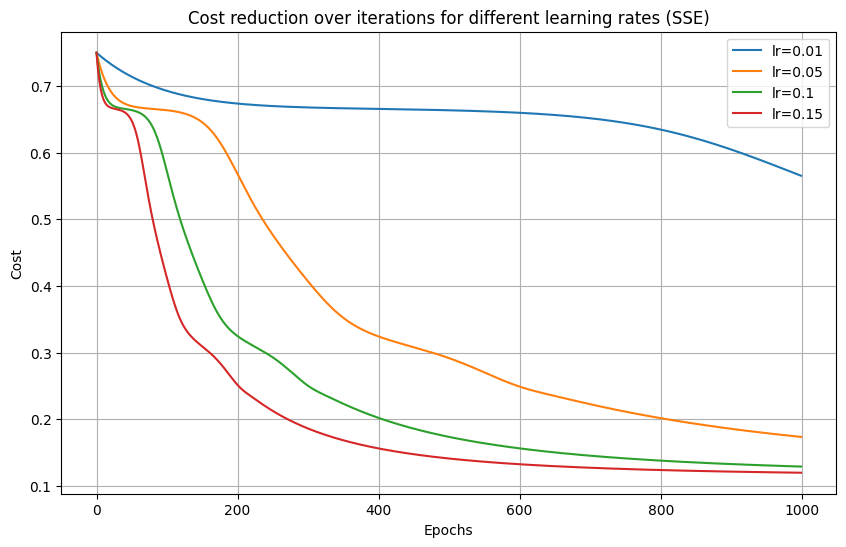

In [ ]:
# Build a model with a n_h-dimensional hidden layer
n_h = 5
learning_rates = [0.01, 0.05, 0.1, 0.15]
lf = "SSE"
models = {}
costs = {}

for lr in learning_rates:
    print(f"\nLearning rate: {lr}")
    parameters, cost = nn_model(X, Y, n_h=5, num_iterations=1000, learning_rate=lr, loss_function = lf ,print_cost=True)
    models[lr] = parameters
    costs[lr] = cost

# Plotting the cost for different learning rates
plt.figure(figsize=(10, 6))
for lr in learning_rates:
    plt.plot(costs[lr], label=f'lr={lr}')

plt.ylabel('Cost')
plt.xlabel('Epochs')
plt.title('Cost reduction over iterations for different learning rates (SSE)')
plt.legend()
plt.grid()
plt.show()

Using the cross-entropy loss function


Learning rate: 0.01
Cost after iteration 0: 2.079011
Cost after iteration 100: 1.963787
Cost after iteration 200: 1.924248
Cost after iteration 300: 1.911772
Cost after iteration 400: 1.906912
Cost after iteration 500: 1.902314
Cost after iteration 600: 1.893756
Cost after iteration 700: 1.875426
Cost after iteration 800: 1.837574
Cost after iteration 900: 1.771487

Learning rate: 0.05
Cost after iteration 0: 2.079011
Cost after iteration 100: 1.902501
Cost after iteration 200: 1.690220
Cost after iteration 300: 1.318071
Cost after iteration 400: 1.109352
Cost after iteration 500: 1.029639
Cost after iteration 600: 0.936357
Cost after iteration 700: 0.875159
Cost after iteration 800: 0.822119
Cost after iteration 900: 0.779358

Learning rate: 0.1
Cost after iteration 0: 2.079011
Cost after iteration 100: 1.698002
Cost after iteration 200: 1.110660
Cost after iteration 300: 0.938731
Cost after iteration 400: 0.823056
Cost after iteration 500: 0.745107
Cost after iteration 600: 0.693074

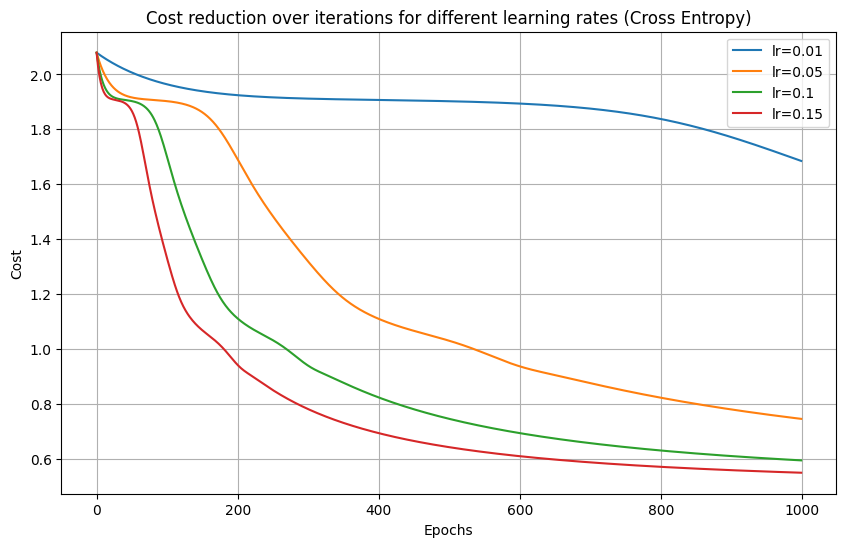

In [ ]:
# Build a model with a n_h-dimensional hidden layer
n_h = 5
learning_rates = [0.01, 0.05, 0.1, 0.15]
lf = "CE"
models = {}
costs = {}

for lr in learning_rates:
    print(f"\nLearning rate: {lr}")
    parameters, cost = nn_model(X, Y, n_h=5, num_iterations=1000, learning_rate=lr, loss_function = lf ,print_cost=True)
    models[lr] = parameters
    costs[lr] = cost

# Plotting the cost for different learning rates
plt.figure(figsize=(10, 6))
for lr in learning_rates:
    plt.plot(costs[lr], label=f'lr={lr}')

plt.ylabel('Cost')
plt.xlabel('Epochs')
plt.title('Cost reduction over iterations for different learning rates (Cross Entropy)')
plt.legend()
plt.grid()
plt.show()

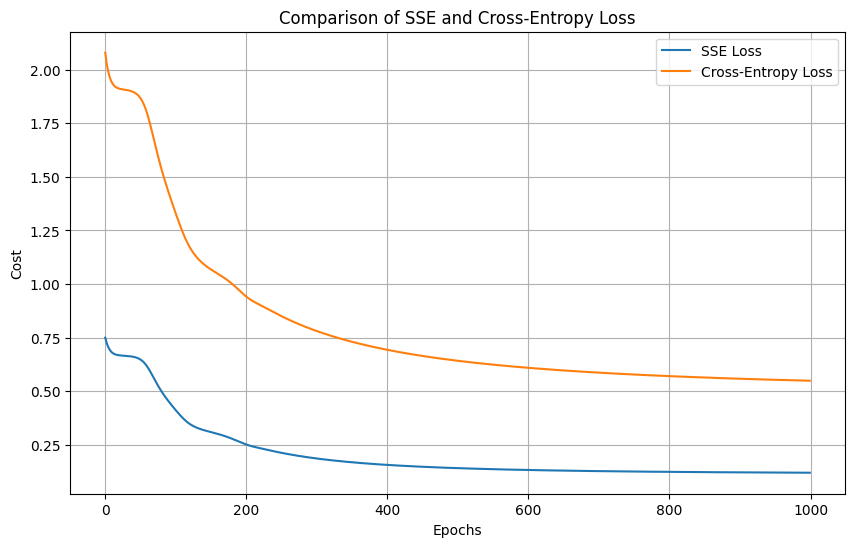

Final output with SSE loss:
 [[0.92269098 0.06747962 0.03024001]
 [0.04899846 0.66168617 0.28545492]
 [0.02995254 0.256288   0.71214351]]
Final output with Cross-Entropy loss:
 [[0.92269098 0.06747962 0.03024001]
 [0.04899846 0.66168617 0.28545492]
 [0.02995254 0.256288   0.71214351]]


In [ ]:
# Function to calculate SSE loss
def compute_sse_loss(A2, Y):
    m = Y.shape[1]
    cost = np.sum((A2 - Y)**2) * 1/m
    return cost

# Function to calculate Cross-Entropy loss
def compute_ce_loss(A2, Y):
    m = Y.shape[1]
    cost = -1/m * np.sum(np.multiply(Y, np.log(A2)) + np.multiply((1-Y), np.log((1-A2))))
    return cost

# Train the model with SSE loss
n_h = 5
learning_rate = 0.15
num_iterations = 1000
parameters_sse, cost_sse = nn_model(X, Y, n_h, learning_rate, "SSE", num_iterations, print_cost=False)

# Train the model with CE loss
parameters_ce, cost_ce = nn_model(X, Y, n_h, learning_rate, "CE", num_iterations, print_cost=False)

# Compare the costs
plt.figure(figsize=(10, 6))
plt.plot(cost_sse, label='SSE Loss')
plt.plot(cost_ce, label='Cross-Entropy Loss')
plt.ylabel('Cost')
plt.xlabel('Epochs')
plt.title('Comparison of SSE and Cross-Entropy Loss')
plt.legend()
plt.grid()
plt.show()

# Compare the final outputs
A2_sse, _ = forward_propagation(X, parameters_sse)
A2_ce, _ = forward_propagation(X, parameters_ce)

print("Final output with SSE loss:\n", A2_sse)
print("Final output with Cross-Entropy loss:\n", A2_ce)

# You can further analyze the outputs and compare their performance on a test set
# if you have one, to see which loss function performs better for your specific problem.


# **L-Layer Deep Neural Network**





**Initialize the parameters of the L-Layer Neural Network**

In [ ]:
def initialize_parameters_deep(layer_dims):
    """
    Arguments:
    layer_dims -- python array (list) containing the dimensions of each layer in our network

    Returns:
    parameters -- python dictionary containing your parameters "W1", "b1", ..., "WL", "bL":
                    Wl -- weight matrix of shape (layer_dims[l], layer_dims[l-1])
                    bl -- bias vector of shape (layer_dims[l], 1)
    """

    np.random.seed(2)
    parameters = {}
    L = len(layer_dims)            # number of layers in the network

    for l in range(1, L):
        parameters['W' + str(l)] = np.random.randn(layer_dims[l], layer_dims[l-1]) * np.sqrt(1 / layer_dims[l-1])
        parameters['b' + str(l)] = np.zeros((layer_dims[l], 1))

        assert(parameters['W' + str(l)].shape == (layer_dims[l], layer_dims[l-1]))
        assert(parameters['b' + str(l)].shape == (layer_dims[l], 1))


    return parameters

In [ ]:
layer_dims = [X.shape[0], 5, 20,10,5, Y.shape[0]]
parameters = initialize_parameters_deep(layer_dims)

for l in range(1, len(parameters) // 2 + 1):
    #print(f"Layer {l}:")
    print("Shape of W" + str(l) + ": " + str(parameters[f'W{l}'].shape))
    print("Shape of b" + str(l) + ": " + str(parameters[f'b{l}'].shape))
    #print(f"W{l}: {parameters[f'W{l}']}")

Shape of W1: (5, 30)
Shape of b1: (5, 1)
Shape of W2: (20, 5)
Shape of b2: (20, 1)
Shape of W3: (10, 20)
Shape of b3: (10, 1)
Shape of W4: (5, 10)
Shape of b4: (5, 1)
Shape of W5: (3, 5)
Shape of b5: (3, 1)


**Forward Propagation**

In [ ]:
def forward_propagation_deep(X, parameters, activation):
    """
    Implement forward propagation for the [LINEAR->RELU]*(L-1)->LINEAR->SIGMOID computation
    """

    forward_cache = {}
    forward_cache["A0"] = X
    L = len(parameters) // 2 # number of layers in the neural network

    # Implement [LINEAR -> RELU]*(L-1). Add "cache" to the "caches" list.
    for l in range(1, L):
        forward_cache["Z" + str(l)] = np.dot(parameters["W" + str(l)], forward_cache["A" + str(l-1)]) + parameters["b" + str(l)]

        if activation == "sigmoid":
            forward_cache["A" + str(l)] = sigmoid(forward_cache["Z" + str(l)])
        elif activation == "relu":
            forward_cache["A" + str(l)] = relu(forward_cache["Z" + str(l)])

    # Implement LINEAR -> SIGMOID. Add "cache" to the "caches" list.
    forward_cache["Z" + str(L)] = np.dot(parameters["W" + str(L)], forward_cache["A" + str(L-1)]) + parameters["b" + str(L)]
    forward_cache["A" + str(L)] = sigmoid(forward_cache["Z" + str(L)])


    return forward_cache["A" + str(L)], forward_cache

**Cost Function**

In [ ]:
def compute_cost_deep(AL, Y, loss_function = "SSE"):
  """
    Implement the cost function defined by equation (7).

    Arguments:
    AL -- probability vector corresponding to your label predictions, shape (1, number of examples)
    Y -- true "label" vector , shape (1, number of examples)

    Returns:
    cost -- cross-entropy cost
    """

  m = Y.shape[1]
  if loss_function == "SSE":
    cost = np.sum((AL - Y)**2) * 1/m

  elif loss_function == "CE":
    cost = -1/m * np.sum(np.multiply(Y, np.log(AL)) + np.multiply((1-Y), np.log((1-AL))))

  cost = np.squeeze(cost)      # To make sure your cost's shape is what we expect

  return cost


**Activation functions derivatives**

In [ ]:
def derivative_relu(x):
  return np.where(x > 0, 1, 0)

def derivative_sigmoid(x):
  return np.multiply(x, 1 - x)

def derivative_tanh(x):
  return 1 - np.power(x, 2)

**BackPropagation**

In [ ]:
def backward_propagation_deep(AL, Y, parameters, forward_cache, activation):
  """
    Implement the backpropagation.

    Arguments:
    AL -- probability vector corresponding to your label predictions, shape (1, number of examples)
    Y -- true "label" vector
    parameters -- python dictionary containing your parameters
    forward_cache -- a dictionary containing "Z1", "A1", "Z2" and "A2"
    activation -- the activation to be used in this layer, stored as a text string: "sigmoid" or "relu"


    Returns:
    cost -- cross-entropy cost
    """
  grads = {}
  L = len(parameters) // 2  # Number of layers in the neural network
  m = Y.shape[1]

  grads["dA" + str(L)] = AL - Y
  grads["dW" + str(L)] = 1/m * np.dot(grads["dA" + str(L)], forward_cache["A" + str(L-1)].T)
  grads["db" + str(L)] = 1/m * np.sum(grads["dA" + str(L)], axis=1, keepdims=True)

  for l in reversed(range(1, L)):
    if activation == "relu":
       grads["dZ" + str(l)] = np.dot(parameters["W" + str(l+1)].T, grads["dA" + str(l+1)]) * derivative_relu(forward_cache["A" + str(l)])

    elif activation == "sigmoid":
       grads["dZ" + str(l)] = np.dot(parameters["W" + str(l+1)].T, grads["dA" + str(l+1)]) * derivative_sigmoid(forward_cache["A" + str(l)])
    grads["dW" + str(l)] = 1/m * np.dot(grads["dZ" + str(l)], forward_cache["A" + str(l-1)].T)
    grads["db" + str(l)] = 1/m * np.sum(grads["dZ" + str(l)], axis=1, keepdims=True)

  return grads

**Update Parameters**

In [ ]:
def update_parameters(parameters, grads, learning_rate):
  """
    Update parameters using the gradient descent

    Argument:
    parameters -- python dictionary containing parameters
    grads -- python dictionary containing gradients

    Return:
    parameters -- python dictionary containing updated parameters
    """

  L = len(parameters) // 2

  for l in range(1, L+1):
      parameters["W" + str(l)] = parameters["W" + str(l)] - learning_rate * grads["dW" + str(l)]
      parameters["b" + str(l)] = parameters["b" + str(l)] - learning_rate * grads["db" + str(l)]

  return parameters


**Model Function**

In [ ]:
def model(X, Y, layer_dims, learning_rate, loss_function, activation="sigmoid", num_iterations=1000):
    """

    """
    parameters = initialize_parameters_deep(layer_dims)
    costs = []

    for i in range(0, num_iterations):
        AL, forward_cache = forward_propagation_deep(X, parameters, activation)
        cost = compute_cost_deep(AL, Y, loss_function)
        grads = backward_propagation_deep(AL, Y, parameters, forward_cache, activation)
        parameters = update_parameters(parameters, grads, learning_rate)

        if i % 100 == 0:
            print("Cost after iteration %i: %f" % (i, cost))

        costs.append(cost)



    return parameters,costs

Using SSE


Learning rate: 0.01
Cost after iteration 0: 0.746700
Cost after iteration 100: 0.636893
Cost after iteration 200: 0.578861
Cost after iteration 300: 0.534845
Cost after iteration 400: 0.494289
Cost after iteration 500: 0.455989
Cost after iteration 600: 0.420642
Cost after iteration 700: 0.388721
Cost after iteration 800: 0.360115
Cost after iteration 900: 0.334267

Learning rate: 0.05
Cost after iteration 0: 0.746700
Cost after iteration 100: 0.456351
Cost after iteration 200: 0.310684
Cost after iteration 300: 0.204009
Cost after iteration 400: 0.119096
Cost after iteration 500: 0.068139
Cost after iteration 600: 0.041067
Cost after iteration 700: 0.026460
Cost after iteration 800: 0.018105
Cost after iteration 900: 0.013015

Learning rate: 0.1
Cost after iteration 0: 0.746700
Cost after iteration 100: 0.310996
Cost after iteration 200: 0.119358
Cost after iteration 300: 0.041111
Cost after iteration 400: 0.018109
Cost after iteration 500: 0.009736
Cost after iteration 600: 0.005967

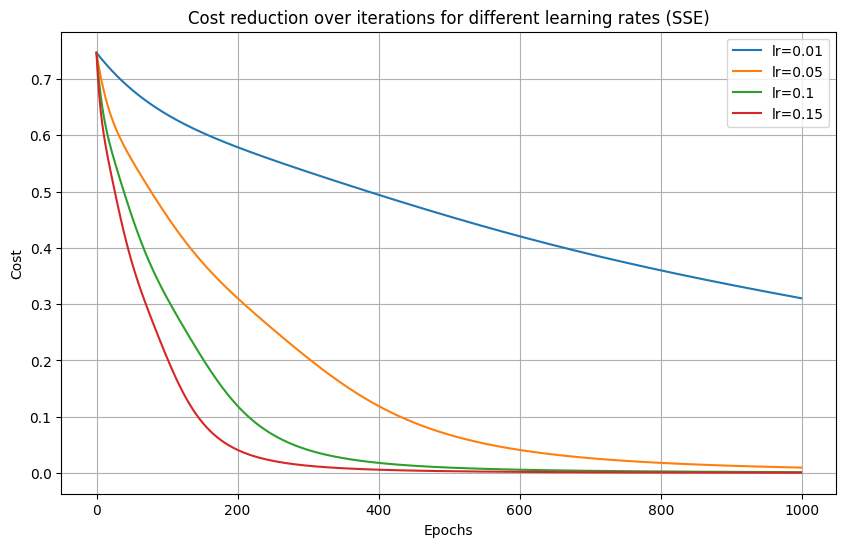

In [ ]:
layer_dims = [X.shape[0], n_h,  Y.shape[0]]
learning_rates = [0.01, 0.05, 0.1, 0.15]
costs_for_lr = {}  # Store costs for each learning rate
lf = "SSE"
iters = 1000

for lr in learning_rates:
    print(f"\nLearning rate: {lr}")
    parameters, cost = model(X, Y, layer_dims, lr, lf, activation = "sigmoid", num_iterations = iters)
    costs_for_lr[lr] = cost

# Plotting the cost for different learning rates
plt.figure(figsize=(10, 6))
for lr, costs in costs_for_lr.items():
    plt.plot(costs, label=f'lr={lr}')

plt.ylabel('Cost')
plt.xlabel('Epochs')
plt.title('Cost reduction over iterations for different learning rates (SSE)')
plt.legend()
plt.grid()
plt.show()


Using Cross Entropy


Learning rate: 0.01
Cost after iteration 0: 2.072838
Cost after iteration 100: 1.846660
Cost after iteration 200: 1.723834
Cost after iteration 300: 1.626264
Cost after iteration 400: 1.534436
Cost after iteration 500: 1.446383
Cost after iteration 600: 1.363624
Cost after iteration 700: 1.287259
Cost after iteration 800: 1.217337
Cost after iteration 900: 1.153075

Learning rate: 0.05
Cost after iteration 0: 2.072838
Cost after iteration 100: 1.447103
Cost after iteration 200: 1.093818
Cost after iteration 300: 0.827532
Cost after iteration 400: 0.604289
Cost after iteration 500: 0.445622
Cost after iteration 600: 0.341231
Cost after iteration 700: 0.271771
Cost after iteration 800: 0.223726
Cost after iteration 900: 0.189096

Learning rate: 0.1
Cost after iteration 0: 2.072838
Cost after iteration 100: 1.094501
Cost after iteration 200: 0.604936
Cost after iteration 300: 0.341388
Cost after iteration 400: 0.223738
Cost after iteration 500: 0.163182
Cost after iteration 600: 0.127396

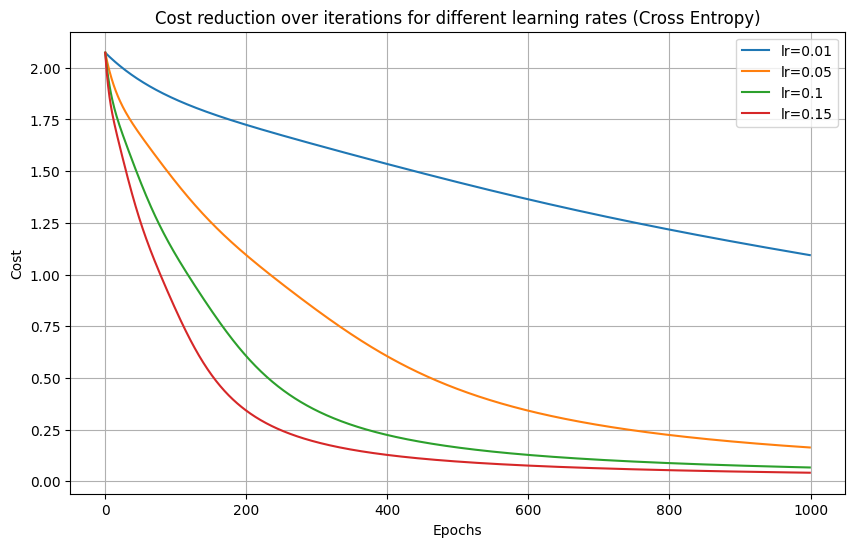

In [ ]:
layer_dims = [X.shape[0], n_h,  Y.shape[0]]
learning_rates = [0.01, 0.05, 0.1, 0.15]
costs_for_lr = {}  # Store costs for each learning rate
lf = "CE"
iters = 1000

for lr in learning_rates:
    print(f"\nLearning rate: {lr}")
    parameters, cost = model(X, Y, layer_dims, lr, lf, activation = "sigmoid", num_iterations = iters)
    costs_for_lr[lr] = cost

# Plotting the cost for different learning rates
plt.figure(figsize=(10, 6))
for lr, costs in costs_for_lr.items():
    plt.plot(costs, label=f'lr={lr}')

plt.ylabel('Cost')
plt.xlabel('Epochs')
plt.title('Cost reduction over iterations for different learning rates (Cross Entropy)')
plt.legend()
plt.grid()
plt.show()


**Using Keras Implementation**

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Flatten, Dense, Input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy

Using SSE as the loss function

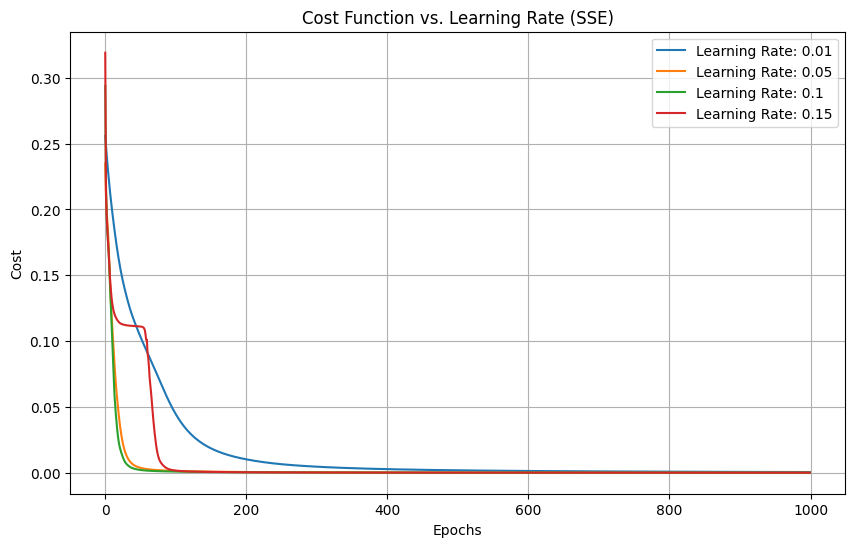

In [ ]:
learning_rates = [0.01, 0.05, 0.1, 0.15]
costs_sse = []

for lr in learning_rates:
  model = Sequential([
      Input(shape=(30,)),Flatten(),
      Dense(units=5, activation='sigmoid'),
      Dense(units=3, activation='sigmoid'),
  ])
  model.compile(optimizer=Adam(learning_rate=lr), loss='mse', metrics=['accuracy'])
  history = model.fit(x=X.T, y=Y, batch_size=10, epochs=1000, shuffle=False, verbose=0)
  costs_sse.append(history.history['loss'])

plt.figure(figsize=(10, 6))
for i, lr in enumerate(learning_rates):
  plt.plot(costs_sse[i], label=f'Learning Rate: {lr}')

plt.xlabel('Epochs')
plt.ylabel('Cost')
plt.title('Cost Function vs. Learning Rate (SSE)')
plt.legend()
plt.grid(True)
plt.show()

Using cross entropy as the loss function

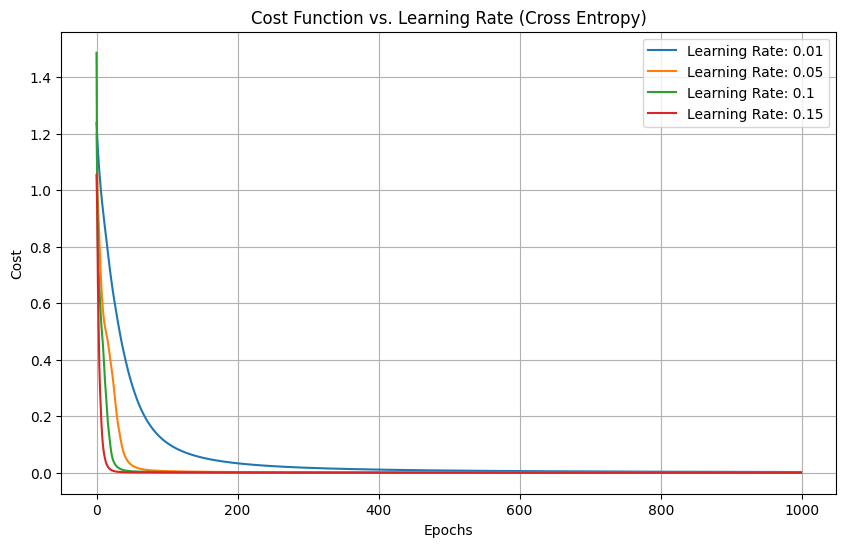

In [ ]:
learning_rates = [0.01, 0.05, 0.1, 0.15]
costs_ce = []

for lr in learning_rates:
  model = Sequential([
      Input(shape=(30,)),Flatten(),
      Dense(units=5, activation='sigmoid'),
      Dense(units=3, activation='sigmoid'),
  ])
  model.compile(optimizer=Adam(learning_rate=lr), loss= "categorical_crossentropy", metrics=['accuracy'])
  history = model.fit(x=X.T, y=Y, batch_size=10, epochs=1000, shuffle=False, verbose=0)
  costs_ce.append(history.history['loss'])

plt.figure(figsize=(10, 6))
for i, lr in enumerate(learning_rates):
  plt.plot(costs_ce[i], label=f'Learning Rate: {lr}')

plt.xlabel('Epochs')
plt.ylabel('Cost')
plt.title('Cost Function vs. Learning Rate (Cross Entropy)')
plt.legend()
plt.grid(True)
plt.show()

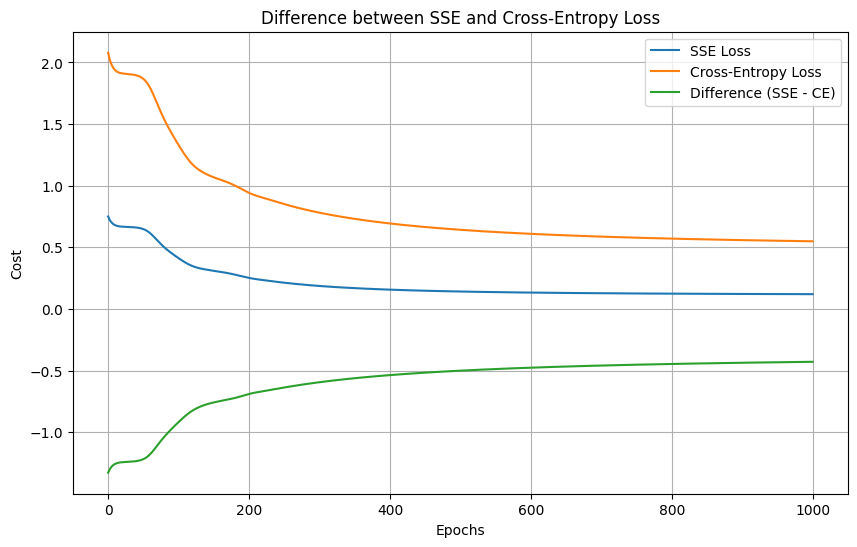

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(cost_sse, label='SSE Loss')
plt.plot(cost_ce, label='Cross-Entropy Loss')
plt.plot(np.array(cost_sse) - np.array(cost_ce), label='Difference (SSE - CE)')  # Plot the difference

plt.ylabel('Cost')
plt.xlabel('Epochs')
plt.title('Difference between SSE and Cross-Entropy Loss')
plt.legend()
plt.grid()
plt.show()
